In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv('labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
test = pd.read_csv('testData.tsv', header=0, delimiter='\t', quoting=3)
train.shape

(25000, 3)

In [2]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [3]:
test.shape

(25000, 2)

In [4]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [5]:
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [6]:
test.columns

Index(['id', 'review'], dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [8]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [10]:
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

## 데이터 정제
* BeautifulSoup을 통해 HTML 태그 제거
* 정규표현식으로 알파벳 이외의 문자를 공백으로 치환
* NLTK 데이터를 사용해 불용어 제거
* 어간추출(Steming)과 음소표기법(Lemmatizing)의 개념을 이해하고    
  SnowballStemmer를 통해 어간을 추출

In [11]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train['review'][0], 'html5lib')
print(train['review'][0][:700])
example1.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

### 정규표현식을 사용하여 특수 문자 제거

In [12]:
import re

letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [13]:
# 소문자로 변환
lower_case = letters_only.lower()

# 토큰화
words = lower_case.split()
print(len(words))
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

### 불용어 제거
* ex) i, me, my, it, thiw, that, is, are등

In [14]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

### 어간 추출(Stemming)

In [16]:
# Porter Stemmer
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem('maximum'))
print('The stemmed form of running is : {}'.format(stemmer.stem('running')))
print('The stemmed form of runs is : {}'.format(stemmer.stem('runs')))
print('The stemmed form of run is : {}'.format(stemmer.stem('run')))

maximum
The stemmed form of running is : run
The stemmed form of runs is : run
The stemmed form of run is : run


In [17]:
# Lancaster Stemmer
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print('The stemmed form of running is : {}'.format(lancaster_stemmer.stem('running')))
print('The stemmed form of runs is : {}'.format(lancaster_stemmer.stem('runs')))
print('The stemmed form of run is : {}'.format(lancaster_stemmer.stem('run')))

maxim
The stemmed form of running is : run
The stemmed form of runs is : run
The stemmed form of run is : run


In [18]:
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [19]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
words = [stemmer.stem(w) for w in words]
words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

### Lemmatization 음소표기법
* 단어의 쓰임(동음이의어의 명사나 동사)에 따라 적합한 의미를 갖도록 추출    
  meet : 회의, 만나다

In [20]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

words = [wordnet_lemmatizer.lemmatize(w) for w in words]
words[:10]

fly
fly


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

## 문자열 처리

In [21]:
def review_to_words(raw_review):
    # 1. HTML제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 특수문자 공백처리
    letters_only = re.sub('[^a-zA-z]', ' ', review_text)
    # 3. 소문자 변환 + 토큰화
    words = letters_only.lower().split()
    # 4. 파이썬에서 리스트보다 세트로 색인이 빠름
    # stopwords를 set으로 변환
    stops = set(stopwords.words('english'))
    # 5. 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    #7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return(' '.join(stemming_words))

clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [22]:
num_reviews = train['review'].size
num_reviews

25000

In [23]:
test['review'].size

25000

In [24]:
# 전체 데이터 처리

# 1
def clean_data(data):
    clean_reviews = []
    for i in range(num_reviews):
        if (i + 1)%5000 == 0:
            print('Review {} of {}'.format(i+1, num_reviews))
        clean_reviews.append(review_to_words(data['review'][i]))
    return clean_reviews

train['review_clean'] = clean_data(train)
test['review_clean'] = clean_data(test)
# 2
# %time tran['review_clean'] = train['review'].apply(review_to_words)

# 3. Multi processing
# http://www.racketracer.com/2016/07/06/pandas-in-parallel/
# from multiprocessing import Pool
# import numpy as np

# def _apply_df(args):
#     df, func, kwargs = args
#     return df.apply(func, **kwargs)

# def apply_by_multiprocessing(df, func, **kwargs):
#     # 키워드 항목 중 wordkers 파리미터를 꺼냄
#     workers = kwargs.pop('workers')
    
#     # 위에서 가져온 workers 수로 프로세스 풀을 정의
#     pool = Pool(processes = workers)
    
#     # 실행할 함수와 데이터프레임을 워커의 수만큼 나눠서 작업
#     result = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)])
#     pool.close()
    
#     # 작업 결과를 합쳐서 반환
#     return pd.concat(list(result))
# %time clean_train_reviews = apply_by_multiprocessing(\
#             train['review'], review_to_words, workers=2)
# %time clean_test_reviews = apply_by_multiprocessing(\
#             test['review'], review_to_words, workers=2)

Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
Review 25000 of 25000
Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
Review 25000 of 25000


## 워드클라우드

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data=None, backgroundcolor='white', width=800, height=600):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

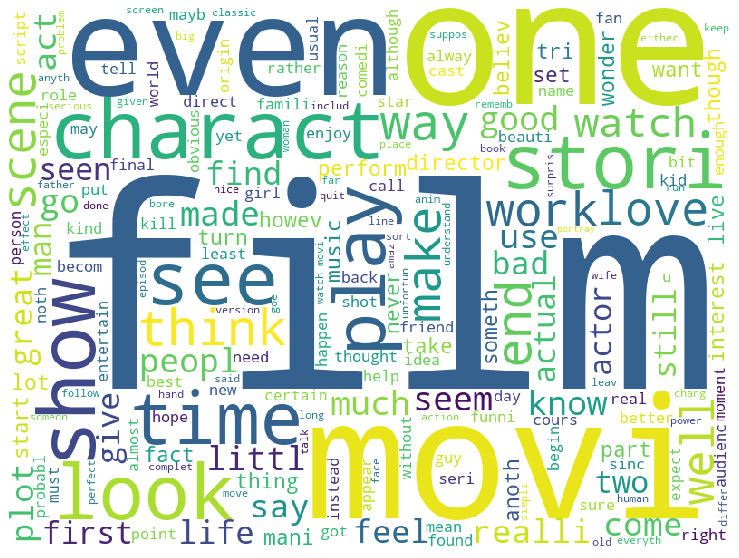

In [26]:
clean_train_reviews = ' '.join(list(train['review_clean'].values))
displayWordCloud(clean_train_reviews)

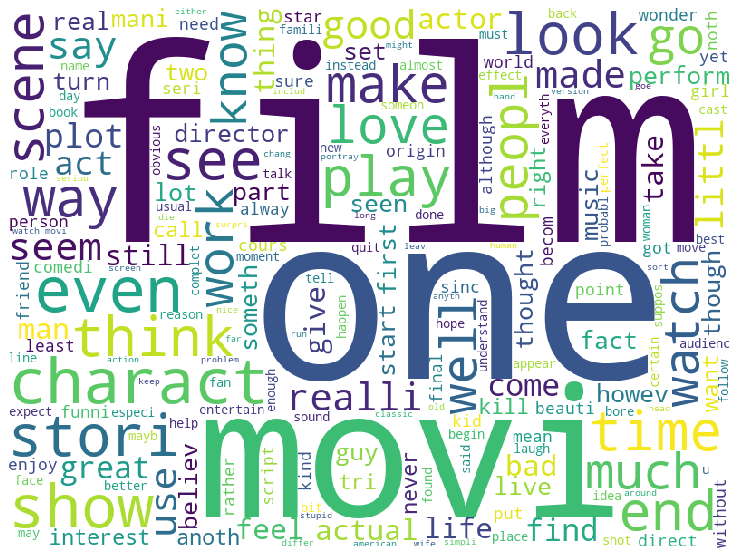

In [27]:
clean_test_reviews = ' '.join(list(test['review_clean'].values))
displayWordCloud(clean_test_reviews)

In [28]:
# 단어 수
train['num_words'] = train['review_clean'].apply(lambda x: len(str(x).split()))

# 중복 제거한 단어 수
train['num_uniq_words'] = train['review_clean'].apply(lambda x: len(set(str(x).split())))

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              25000 non-null  object
 1   sentiment       25000 non-null  int64 
 2   review          25000 non-null  object
 3   review_clean    25000 non-null  object
 4   num_words       25000 non-null  int64 
 5   num_uniq_words  25000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [30]:
train.head()

,id,sentiment,review,review_clean,num_words,num_uniq_words
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",stuff go moment mj start listen music watch od...,219,156
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",\ classic war worlds\ timothi hine entertain f...,88,65
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",film start manag nichola bell give welcom inve...,240,201
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",must assum prais film \ greatest film opera ev...,195,160
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",superbl trashi wondrous unpretenti exploit hoo...,213,190


In [31]:
x = train['review_clean'][0]
x = str(x).split()
print(len(x))
x[:10]

219


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

리뷰별 단어 평균값 : 121.18492
리뷰별 단어 중간값 : 90.0
리뷰별 단어 평균값 : 94.82212
리뷰별 단어 중간값 : 75.0


Text(0.5, 1.0, '리뷰별 고유한 단어 수 분포')

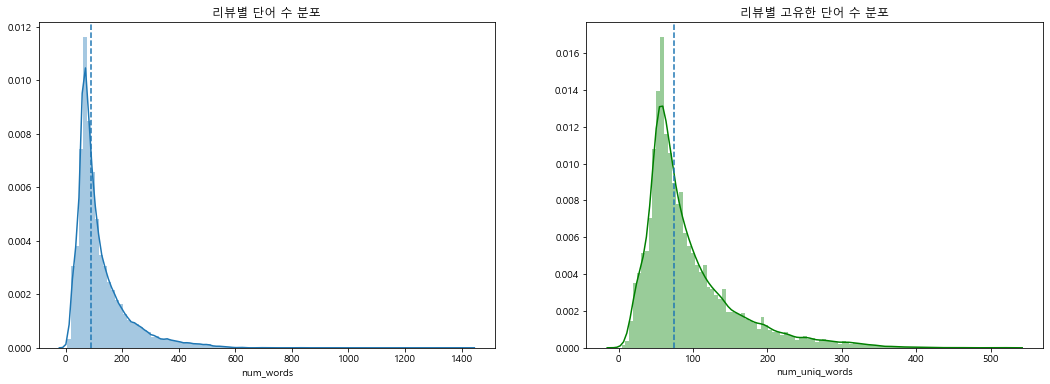

In [34]:
import matplotlib
import seaborn as sns
# Windows
matplotlib.rc('font', family='Malgun Gothic')

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18,6)

print('리뷰별 단어 평균값 :', train['num_words'].mean())
print('리뷰별 단어 중간값 :', train['num_words'].median())
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed')
axes[0].set_title('리뷰별 단어 수 분포')

print('리뷰별 단어 평균값 :', train['num_uniq_words'].mean())
print('리뷰별 단어 중간값 :', train['num_uniq_words'].median())
sns.distplot(train['num_uniq_words'], bins=100, color='g', ax=axes[1])
axes[1].axvline(train['num_uniq_words'].median(), linestyle='dashed')
axes[1].set_title('리뷰별 고유한 단어 수 분포')

## Bag of words 모델

### CountVectorizer로 텍스트 데이터 벡터화
* 정규표현식을 사용해 토큰을 추출
* 소문자로 변환
* 의미없는 특성을 많이 생성하기 때문에 적어도 두 개의 문서에 나타난 토큰만을 사용
* min_df로 토큰이 나타날 최소 문서 개수 지정

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            min_df = 2,
                            ngram_range=(1, 3),
                            max_features = 20000)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=20000, min_df=2,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [38]:
# 속도 개선을 위해 파이프라인 사용
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [41]:
%time train_data_features = pipeline.fit_transform(train['review_clean'])

Wall time: 30.1 s


In [42]:
train_data_features.shape

(25000, 20000)

In [43]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

20000


['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [44]:
# 벡터화된 피쳐를 확인해 봄
import numpy as np
dist = np.sum(train_data_features, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[26 48 22 ... 59 40 23]] aag


,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi film,zombi flick,zombi movi,zombie,zone,zoo,zoom,zorro,zu,zucker
0,26,48,22,287,24,30,29,30,125,55,...,50,37,85,34,161,31,71,59,40,23


In [45]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi film,zombi flick,zombi movi,zombie,zone,zoo,zoom,zorro,zu,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## RandomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2018, verbose=0,
                       warm_start=False)

In [47]:
%time forest = forest.fit(train_data_features, train['sentiment'])

Wall time: 27.2 s


In [48]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
        forest, train_data_features, \
        train['sentiment'], cv=10, scoring='roc_auc'))

Wall time: 4min 4s


In [49]:
train['review_clean'][0]

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [50]:
# 테스트 데이터를 벡터화 함
%time test_data_features = pipeline.transform(test['review_clean'])
test_data_features = test_data_features.toarray()

Wall time: 8.79 s


In [51]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
test_data_features[5][:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
# 벡터화하여 만든 사전에서 해당 단어가 무엇인지 볼 수 있음
vocab[8], vocab[2558], vocab[2559], vocab[2560]

('abc', 'charact real', 'charact realli', 'charact relationship')

In [55]:
result = forest.predict(test_data_features)
result[:10]

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [56]:
output = pd.DataFrame(data={'id' : test['id'], 'sentiment' : result})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1


In [60]:
output.to_csv('tutorial_1_BOW_{0:.5f}.csv'.format(score), index=False, quoting=3)

In [61]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

-80


1    12540
0    12460
Name: sentiment, dtype: int64

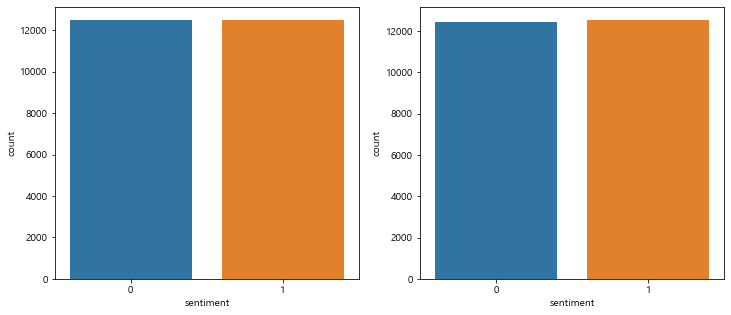

In [62]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])